# Data analysis for Text Analysis and Retrieval project 2022/2023 - SOTA team

In [2]:
import pandas as pd
from scipy.stats import chi2_contingency

In [3]:
#import data set
df = pd.read_excel('../data/essays.xlsx')

In [4]:
df.head()

,#AUTHID,TEXT,cEXT,cNEU,cAGR,cCON,cOPN
0,1997_504851.txt,"Well, right now I just woke up from a mid-day ...",n,y,y,n,y
1,1997_605191.txt,"Well, here we go with the stream of consciousn...",n,n,y,n,n
2,1997_687252.txt,An open keyboard and buttons to push. The thin...,n,y,n,y,y
3,1997_568848.txt,I can't believe it! It's really happening! M...,y,n,y,y,n
4,1997_688160.txt,"Well, here I go with the good old stream of co...",y,n,y,n,y


In [8]:
#check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2467 entries, 0 to 2466
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   #AUTHID  2467 non-null   object
 1   TEXT     2467 non-null   object
 2   cEXT     2467 non-null   object
 3   cNEU     2467 non-null   object
 4   cAGR     2467 non-null   object
 5   cCON     2467 non-null   object
 6   cOPN     2467 non-null   object
dtypes: object(7)
memory usage: 135.0+ KB


In [10]:
#data description
df.describe()

,#AUTHID,TEXT,cEXT,cNEU,cAGR,cCON,cOPN
count,2467,2467,2467,2467,2467,2467,2467
unique,2467,2467,2,2,2,2,2
top,1997_504851.txt,"Well, right now I just woke up from a mid-day ...",y,n,y,y,y
freq,1,1,1276,1234,1310,1253,1271


In [76]:
def chi2_test(crosstab, alpha=0.05, plot=False, col_names=None):
    stat, p, dof, expected = chi2_contingency(crosstab)

    print("p value is " + str(p))
    if p <= alpha:
        print(col_names, 'are dependent (reject H0)')
    else:
        print(col_names, 'are independent (H0 holds true)')

    if plot:
        crosstab.plot(kind='bar')

In [78]:
p_array = ['cEXT', 'cNEU', 'cAGR', 'cCON', 'cOPN']

for i in range(len(p_array)-1):
    for j in range(1,len(p_array)-i):
        ct = pd.crosstab(df[p_array[i]], df[p_array[i+j]])
        chi2_test(ct, col_names=str(p_array[i]) + ' ' + str(p_array[i+j]))
        print()

p value is 2.444811777049674e-15
cEXT cNEU are dependent (reject H0)

p value is 8.760553412406839e-10
cEXT cAGR are dependent (reject H0)

p value is 1.787066710462952e-11
cEXT cCON are dependent (reject H0)

p value is 0.00010529059197911394
cEXT cOPN are dependent (reject H0)

p value is 6.672729280979142e-21
cNEU cAGR are dependent (reject H0)

p value is 2.691551256358377e-13
cNEU cCON are dependent (reject H0)

p value is 0.020569711026882685
cNEU cOPN are dependent (reject H0)

p value is 3.37922625078336e-11
cAGR cCON are dependent (reject H0)

p value is 0.3927407789269992
cAGR cOPN are independent (H0 holds true)

p value is 0.19600085301681122
cCON cOPN are independent (H0 holds true)



In [5]:
personalities=["cEXT", "cNEU", "cAGR", "cCON", "cOPN"]

for personality in personalities:
    df[personality].replace(["y", "n"], [1, 0], inplace=True)

df.head()

,#AUTHID,TEXT,cEXT,cNEU,cAGR,cCON,cOPN
0,1997_504851.txt,"Well, right now I just woke up from a mid-day ...",0,1,1,0,1
1,1997_605191.txt,"Well, here we go with the stream of consciousn...",0,0,1,0,0
2,1997_687252.txt,An open keyboard and buttons to push. The thin...,0,1,0,1,1
3,1997_568848.txt,I can't believe it! It's really happening! M...,1,0,1,1,0
4,1997_688160.txt,"Well, here I go with the good old stream of co...",1,0,1,0,1


In [16]:
x=df.iloc[:,2:].sum()

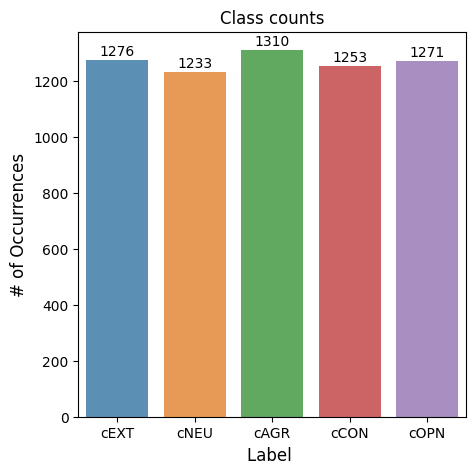

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,5))
ax= sns.barplot(x=x.index, y=x.values, alpha=0.8)
plt.title("Class counts")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('Label ', fontsize=12)

rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In [28]:
rowsums=df.iloc[:,2:].sum(axis=1)
counts = rowsums.value_counts().sort_index()
counts

0     60
1    343
2    784
3    761
4    446
5     73
Name: count, dtype: int64

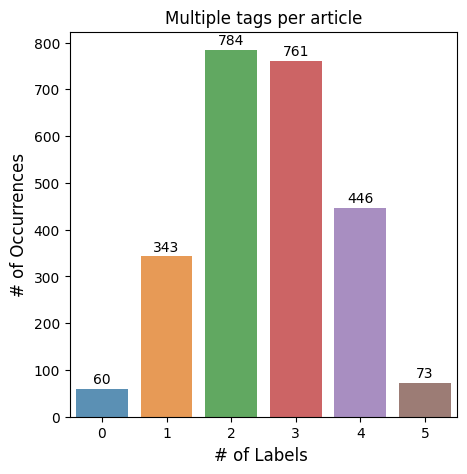

In [29]:
plt.figure(figsize=(5,5))
ax = sns.barplot(x=counts.index, y=counts.values, alpha=0.8)
plt.title("Multiple tags per article")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('# of Labels ', fontsize=12)

#adding the text labels
rects = ax.patches
labels = counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()